## Payment Date Prediction 


In [1]:
#importing the essential libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from fast_ml.feature_selection import get_constant_features
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR

In [2]:
#Store the dataset into the Dataframe
df = pd.read_csv('dataset_for_ML_Model.csv')

In [3]:
#checking the shape of dataframe
df.shape

(50000, 19)

In [4]:
#Check the Detail information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
#Display All the column names
print(df.columns)

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')


In [6]:
#Describe the entire dataset
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

In [7]:
#Showing top 5 records from the dataset
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [8]:
#Displaying the Null values percentage against every columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
business_code,business_code,0.000
cust_number,cust_number,0.000
name_customer,name_customer,0.000
clear_date,clear_date,20.000
buisness_year,buisness_year,0.000
doc_id,doc_id,0.000
posting_date,posting_date,0.000
document_create_date,document_create_date,0.000
document_create_date.1,document_create_date.1,0.000
due_in_date,due_in_date,0.000


In [9]:
#Display Invoice_id and Doc_Id
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


In [10]:
#Please check, Column 'posting_id' is constant columns or not
df.nunique()

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

In [11]:
# we dropped the following columns 'area_business','posting_id','invoice_id', 'document_create_date','isOpen', 'document type', 'document_create_date.1'
df.drop(columns=['area_business','posting_id','invoice_id', 'document_create_date','isOpen', 'document type', 'document_create_date.1'], inplace=True)

In [12]:
#ensuring that the dataframe does not have the above columns.
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [13]:
#showing all duplicate rows from dataframe.
duplicate = df[df.duplicated()]
duplicate

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


In [14]:
#displaying the number of duplicate rows.
duplicate.shape

(1161, 12)

In [15]:
#dropping duplicate rows from dataframe.
df.drop_duplicates(inplace=True)

In [16]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


In [17]:
#duplicate rows are 0 now.
duplicate.shape

(1161, 12)

In [18]:
#checking number of rows and columns in df
df.shape

(48839, 12)

In [19]:
#checking number of null values in each column
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type Conversion

In [20]:
#checking the datatype of each column in dataframe.
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [21]:
#checking the datatype format of specific columns
dt_clear_date=df['clear_date'].dtype
dt_posting_date=df['posting_date'].dtype
dt_due_in_date=df['due_in_date'].dtype
dt_baseline_create_date=df['baseline_create_date'].dtype
print("clear_date:",dt_clear_date)
print("posting_date:",dt_posting_date)
print("due_in_date:",dt_due_in_date)
print("baseline_create_date:",dt_baseline_create_date)

clear_date: object
posting_date: object
due_in_date: float64
baseline_create_date: float64


In [22]:
#converting date columns into date time formats
df['clear_date'] = pd.to_datetime(df['clear_date']).dt.normalize()
df['posting_date'] = pd.to_datetime(df['posting_date']).dt.normalize()
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format = '%Y%m%d',errors = 'coerce')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format = '%Y%m%d',errors = 'coerce')

In [23]:
#again checking the datatype of each column in dataframe.
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

In [24]:
#performing a count on each currency
df["invoice_currency"].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

In [25]:
#display the "total_open_amount" column value
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

In [26]:
#Convert all CAD into USD currency of "total_open_amount" column
df['converted_usd']=""
df.loc[df['invoice_currency'] =='CAD', 'converted_usd'] = 0.7 * df['total_open_amount']
df.loc[df['invoice_currency'] =='USD', 'converted_usd'] = df['total_open_amount']

In [27]:
#displaying the new "converted_usd" column.to_numeric will convert the dtype from object to float.
df['converted_usd']=pd.to_numeric(df['converted_usd'],errors='coerce')
df["converted_usd"]

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

In [28]:
#display year wise record of buisness_year.
df.sort_values(["buisness_year"])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
24693,U001,0200707005,KING S co,2019-03-27,2019.0,1.928933e+09,2019-03-12,2019-03-27,USD,8195.84,2019-03-12,NAA8,8195.840
30055,CA02,0140104440,SO foundation,2019-05-21,2019.0,2.960546e+09,2019-05-03,2019-05-13,CAD,80920.24,2019-05-03,CA10,56644.168
30056,U001,0200750051,ALBER llc,2019-05-20,2019.0,1.929249e+09,2019-05-03,2019-05-18,USD,84027.27,2019-05-03,NAA8,84027.270
30057,U001,CCU013,KRAFT F us,2019-11-01,2019.0,1.929915e+09,2019-09-28,2019-09-28,USD,31739.22,2019-09-28,NAX2,31739.220
30058,U001,0200749225,SUPER associates,2019-01-29,2019.0,1.928618e+09,2019-01-14,2019-01-29,USD,25542.56,2019-01-14,NAA8,25542.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11258,U001,0200772670,ASSOCIAT associates,2020-01-22,2020.0,1.930362e+09,2020-01-06,2020-01-21,USD,60088.90,2020-01-06,NAU5,60088.900
11261,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930662e+09,2020-03-19,2020-04-03,USD,3270.04,2020-03-19,NAH4,3270.040
33206,CA02,0140104440,SO in,NaT,2020.0,2.960624e+09,2020-03-30,2020-04-11,CAD,40288.97,2020-04-01,CA10,28202.279
33217,U001,0200700919,US co,NaT,2020.0,1.930760e+09,2020-04-07,2020-04-22,USD,40497.33,2020-04-07,NAA8,40497.330


In [29]:
#delete "invoice_currency", "total_open_amount" columns.
df.drop(columns = ["invoice_currency", "total_open_amount"], inplace=True)

In [30]:
#checking number of columns in dataframe.
df.shape[1]

11

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   baseline_create_date  48839 non-null  datetime64[ns]
 9   cust_payment_terms    48839 non-null  object        
 10  converted_usd         48839 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 5.5+ MB


# Splitting the Dataset

In [32]:
#Checking the null values.
df.columns[df.isna().any()].tolist()

['clear_date']

In [33]:
#displaying the number of null values in "clear_date".
df["clear_date"].isnull().sum()

9681

In [34]:
#putting all the notnull() "clear_date" values in train data and null() values in test data.
train = df[df['clear_date'].notnull()]
test = df[df['clear_date'].isnull()]

In [35]:
#checking the rows and columns of both dataframes.
print(train.shape)
print(test.shape)

(39158, 11)
(9681, 11)


In [36]:
train.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [37]:
test.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


In [38]:
#creating a new column "delay"
train['delay']=df['clear_date']-df['due_in_date']

In [39]:
#displaying the delay values.
train["delay"]

0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: delay, Length: 39158, dtype: timedelta64[ns]

In [40]:
#creating new column "avg_delay"
train['avg_delay'] = train.groupby('name_customer')['delay'].transform('mean', numeric_only=False)
train['avg_delay']

0       -3 days +07:08:49.779837776
1                  19 days 00:00:00
2         8 days 02:10:54.545454545
4       -3 days +19:33:27.692307693
5                  71 days 10:40:00
                    ...            
49994             -1 days +14:45:00
49996   -3 days +12:40:08.540925267
49997     1 days 01:08:34.285714285
49998     1 days 13:36:42.985074626
49999   -4 days +02:20:52.173913044
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

In [41]:
#converting avg_delay into secs.
train['avg_delay'] = train['avg_delay'].dt.total_seconds()

In [42]:
#displaying the train dataframe.
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


In [43]:
#dropping 'clear_date','delay' columns.
train.drop(columns=['clear_date','delay'],inplace=True)

In [44]:
X = train[["business_code", "cust_number", "name_customer", "buisness_year", "doc_id", "posting_date", "due_in_date", "baseline_create_date", "cust_payment_terms", "converted_usd"]]
y = train["avg_delay"]

In [45]:
X.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [46]:
X_train, X_loc_test, y_train, y_loc_test= train_test_split(X, y, train_size=0.60, random_state=42)

In [47]:
X_train.head(5)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44556,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAA8,54315.10
36713,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,2020-02-07,2020-01-23,NAA8,52725.92
2639,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,2019-02-14,2019-01-30,NAAX,21126.47
49682,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,2020-01-15,2019-12-31,NAA8,143649.72
45201,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,2019-10-02,2019-09-17,NAH4,14864.00


In [48]:
X_loc_test.head(5)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44405,U001,0200865666,RESTAU us,2020.0,1.930516e+09,2020-02-12,2020-02-27,2020-02-12,NAA8,2761.12
15496,U001,0200762301,C&S WH systems,2019.0,1.930066e+09,2019-10-29,2019-11-13,2019-10-29,NAC6,1308.66
18468,U001,0200769623,WAL-MAR corporation,2019.0,1.930254e+09,2019-12-09,2019-12-24,2019-12-09,NAH4,7589.15
35095,U001,0200759082,INGL associates,2019.0,1.929724e+09,2019-08-08,2019-08-23,2019-08-08,NAA8,19661.32
11539,U001,200780825,SYSCO FO associates,2019.0,1.928702e+09,2019-01-31,2019-02-15,2019-01-31,NAA8,15987.49


In [49]:
y_loc_test.head(5)

44405         0.000000
15496   -108000.000000
18468   -218946.589595
35095     64800.000000
11539    151200.000000
Name: avg_delay, dtype: float64

In [50]:
y_train.head(5)

44556     48000.000000
36713     43200.000000
2639     -55408.695652
49682    184320.000000
45201   -188792.307692
Name: avg_delay, dtype: float64

In [51]:
X_train.shape

(23494, 10)

In [52]:
X_loc_test.shape

(15664, 10)

In [53]:
y_loc_test.shape

(15664,)

In [54]:
y_train.shape

(23494,)

In [55]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, train_size=0.50, random_state=42)

In [56]:
X_val.shape

(7832, 10)

In [57]:
X_test.shape

(7832, 10)

In [58]:
y_val.shape

(7832,)

In [59]:
y_test.shape

(7832,)

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

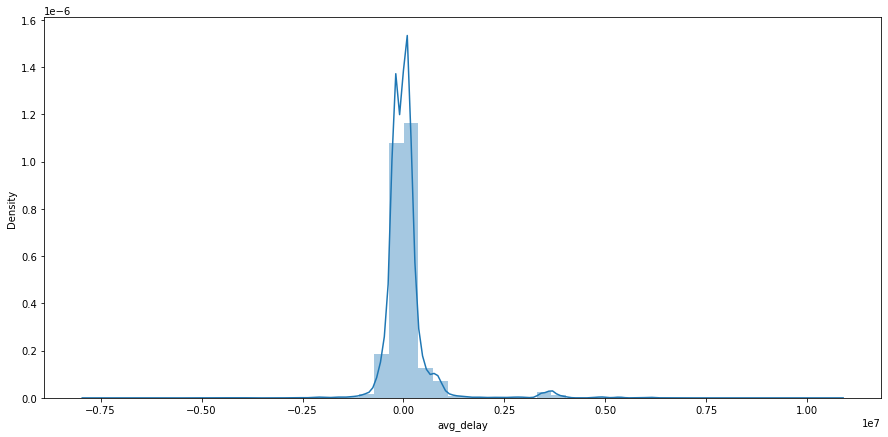

In [60]:
plt.subplots(figsize=(15,7))
sns.distplot(y_train)

In [61]:
dt = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

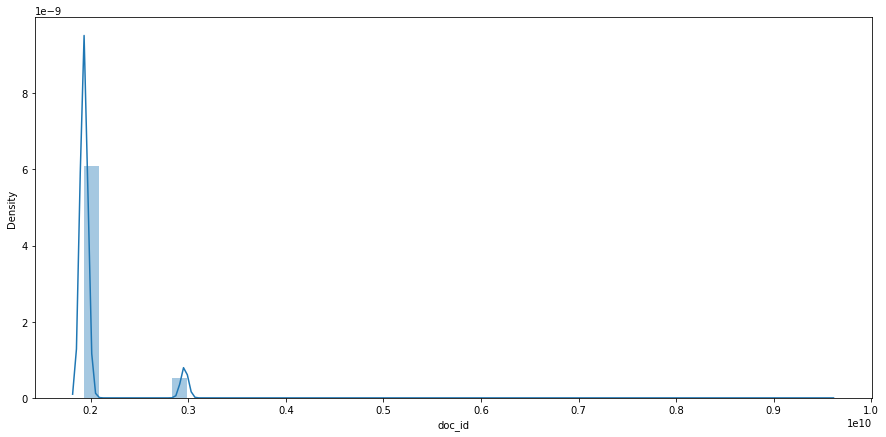

In [62]:
plt.subplots(figsize=(15,7))
sns.distplot(X_train["doc_id"])

<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

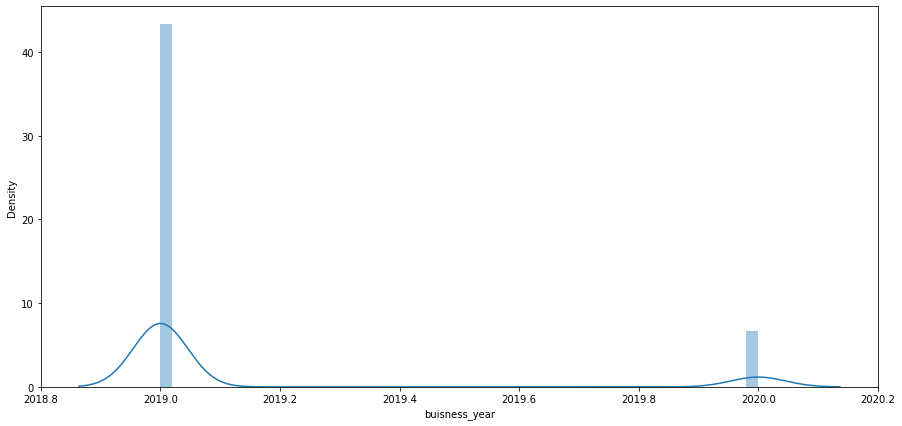

In [63]:
plt.subplots(figsize=(15,7))
sns.distplot(X_train["buisness_year"])

In [64]:
#draw distplot btw doc_id and buisness_year

# Feature Engineering

In [65]:
#Display and describe the X_train dataframe
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44556,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAA8,54315.10
36713,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,2020-02-07,2020-01-23,NAA8,52725.92
2639,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,2019-02-14,2019-01-30,NAAX,21126.47
49682,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,2020-01-15,2019-12-31,NAA8,143649.72
45201,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,2019-10-02,2019-09-17,NAH4,14864.00
...,...,...,...,...,...,...,...,...,...,...
7745,U013,0140103699,L&E IN,2019.0,1.991835e+09,2019-11-15,2019-12-15,2019-11-15,NAVE,20131.46
14076,U001,0200900909,SYSCO co,2019.0,1.929117e+09,2019-04-12,2019-04-27,2019-04-12,NAA8,2363.61
48693,U001,0200769623,WAL-MAR trust,2020.0,1.930413e+09,2020-01-20,2020-02-04,2020-01-20,NAH4,6663.73
1054,U001,0200764795,SYSCO associates,2019.0,1.929948e+09,2019-10-03,2019-10-18,2019-10-03,NAA8,3010.12


In [66]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.134077,2.011913e+09,30618.192289
std,0.340742,2.852458e+08,36500.609654
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929174e+09,4569.665750
50%,2019.000000,1.929732e+09,16795.265000
75%,2019.000000,1.930209e+09,45472.520500
max,2020.000000,9.500000e+09,668593.360000


In [67]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

In [68]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [69]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

In [70]:
X_train[["business_code", "business_code_enc"]]

,business_code,business_code_enc
44556,U001,1
36713,U001,1
2639,U001,1
49682,U001,1
45201,U001,1
...,...,...
7745,U013,5
14076,U001,1
48693,U001,1
1054,U001,1


In [71]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [72]:
X_train ,X_val, X_test = custom(['business_code'])

In [73]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

In [74]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [75]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

In [76]:
X_train ,X_val, X_test = custom(['name_customer'])

In [77]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [78]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

In [79]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [80]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [81]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [82]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

In [83]:
X_train ,X_val, X_test = custom(['posting_date'])

In [84]:
X_train['day_of_baseline'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline'] = X_val['baseline_create_date'].dt.year

X_test['day_of_baseline'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline'] = X_test['baseline_create_date'].dt.year

In [85]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

In [86]:
X_train['day_of_duedate'] = X_train['due_in_date'].dt.day
X_train['month_of_duedate'] = X_train['due_in_date'].dt.month
X_train['year_of_duedate'] = X_train['due_in_date'].dt.year

X_val['day_of_duedate'] = X_val['due_in_date'].dt.day
X_val['month_of_duedate'] = X_val['due_in_date'].dt.month
X_val['year_of_duedate'] = X_val['due_in_date'].dt.year

X_test['day_of_duedate'] = X_test['due_in_date'].dt.day
X_test['month_of_duedate'] = X_test['due_in_date'].dt.month
X_test['year_of_duedate'] = X_test['due_in_date'].dt.year

In [87]:
X_train ,X_val, X_test = custom(['due_in_date'])

In [88]:
print(X_train.dtypes,'\n\n')
print(X_val.dtypes,'\n\n')
print(X_test.dtypes)

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_baseline             int64
month_of_baseline           int64
year_of_baseline            int64
day_of_duedate              int64
month_of_duedate            int64
year_of_duedate             int64
dtype: object 


cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_baseline             int64
month_of_baseline           int64
year_of_baseline            int

# Feature Selection

In [89]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [90]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [91]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [92]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [93]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_baseline',
 'year_of_postingdate',
 'year_of_duedate',
 'day_of_baseline',
 'year_of_baseline',
 'month_of_duedate']

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

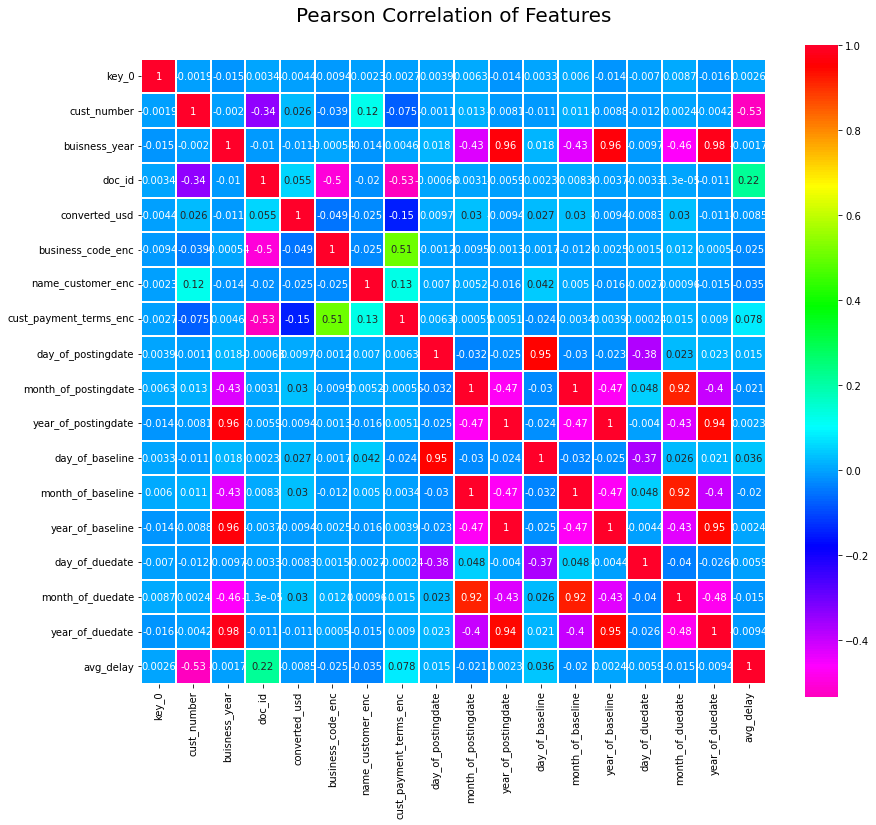

In [94]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [95]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [96]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 1.33223780e+09,
       2.80596482e-01, 1.05187609e+06, 1.23314110e+02, 7.59077911e+01,
       1.23199874e+01, 1.16288980e-01, 7.75034812e+01, 1.23305592e+01,
       1.16501724e-01, 7.61464282e+01, 1.21259307e+01, 1.19305793e-01])

# Modelling

In [97]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [99]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [100]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

515943.3375777222

In [101]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[320162589027.4911],[0.32175339197316966],

In [102]:
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [103]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [104]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

651773.9014090378

In [105]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[320162589027.4911, 477086250513.25867],[0.32175339197316966, -0.010680642387832728],

In [106]:
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [107]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [108]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

457910.14064372925

In [109]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[320162589027.4911, 477086250513.25867, 209273088399.6044],[0.32175339197316966, -0.010680642387832728, 0.5566666212018201],

In [110]:
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [111]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [112]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

345049.21440526535

In [113]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'],[320162589027.4911, 477086250513.25867, 209273088399.6044, 116469691984.98811],[0.32175339197316966, -0.010680642387832728, 0.5566666212018201, 0.7532654462637267],

In [114]:
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [115]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [116]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

328868.64712268143

In [117]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[320162589027.4911, 477086250513.25867, 209273088399.6044, 116469691984.98811, 111304108996.19151],[0.32175339197316966, -0.010680642387832728, 0.5566666212018201, 0.7532654462637267, 0.7642084460416663],

In [118]:
comp_df=pd.DataFrame([Algorithm,MSE_Score, R2_Score],index=['Algorithm','MSE_Score','R2_Score'])
comp_df

,0,1,2,3,4
Algorithm,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor,XGB Regressor
MSE_Score,320162589027.491089,477086250513.258667,209273088399.604401,116469691984.988113,111304108996.191513
R2_Score,0.321753,-0.010681,0.556667,0.753265,0.764208


In [119]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [120]:
print(mean_squared_error(y_test,predictedfinal,squared=False))
print(mean_squared_error(y_val, predict_testfinal, squared=False))

333622.70455739595
328868.64712268143


In [121]:
print("Accuracy for test dataset: ",r2_score(y_test, predictedfinal)*100,"%")
print("Accuracy for val dataset: ",r2_score(y_val, predict_testfinal)*100,"%")
print("Margin: ",r2_score(y_test, predictedfinal)-r2_score(y_val, predict_testfinal))

Accuracy for test dataset:  76.42084460416663 %
Accuracy for val dataset:  74.34851029193163 %
Margin:  0.020723343122349913


# Reason for choosing XGB

#### I chose XGB regressor because it provided minimum MSE and maximum R2 value.

# Passing the null dataframe into the machine learning model.

In [122]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


In [123]:
test.shape

(9681, 11)

In [124]:
print(test.describe(),"\n\n\n")
print(test.info())

       buisness_year        doc_id  converted_usd
count         9681.0  9.681000e+03    9681.000000
mean          2020.0  2.006165e+09   32065.681125
std              0.0  2.673629e+08   35419.613688
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930658e+09    5607.190000
50%           2020.0  1.930731e+09   19024.190000
75%           2020.0  1.930818e+09   47752.640000
max           2020.0  2.960636e+09  653644.800000 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 

In [125]:
backup = test

In [126]:
business_codern = LabelEncoder()
business_codern.fit(test['business_code'])
test['business_code_enc'] = business_codern.transform(test['business_code'])

In [127]:
test['cust_number'] = test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

In [128]:
test['day_of_clear_date'] = test['clear_date'].dt.day
test['month_of_clear_date'] = test['clear_date'].dt.month
test['year_of_clear_date'] = test['clear_date'].dt.year

In [129]:
test['day_of_posting_date'] = test['posting_date'].dt.day
test['month_of_posting_date'] = test['posting_date'].dt.month
test['year_of_posting_date'] = test['posting_date'].dt.year

In [130]:
test['day_of_create_date'] = test['baseline_create_date'].dt.day
test['month_of_create_date'] = test['baseline_create_date'].dt.month
test['year_of_create_date'] = test['baseline_create_date'].dt.year

In [131]:
test['day_of_due'] = test['due_in_date'].dt.day
test['month_of_due'] = test['due_in_date'].dt.month
test['year_of_due'] = test['due_in_date'].dt.year

In [132]:
test['cust_payment_terms_enc']=label_encoder1.transform(test['cust_payment_terms'])
test['business_code_enc']=label_encoder1.transform(test['business_code'])
test['name_customer_enc']=label_encoder.transform(test['name_customer'])

In [133]:
test.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_clear_date                float64
month_of_clear_date              float64
year_of_clear_date               float64
day_of_posting_date                int64
month_of_posting_date              int64
year_of_posting_date               int64
day_of_create_date                 int64
month_of_create_date               int64
year_of_create_date                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
cust_payment_ter

In [134]:
test.drop(columns=['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date',
          'cust_payment_terms','day_of_clear_date','month_of_clear_date','year_of_clear_date'],inplace=True)

In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_posting_date     9681 non-null   int64  
 6   month_of_posting_date   9681 non-null   int64  
 7   year_of_posting_date    9681 non-null   int64  
 8   day_of_create_date      9681 non-null   int64  
 9   month_of_create_date    9681 non-null   int64  
 10  year_of_create_date     9681 non-null   int64  
 11  day_of_due              9681 non-null   int64  
 12  month_of_due            9681 non-null   int64  
 13  year_of_due             9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 6118 to 44809
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_baseline         7832 non-null   int64  
 11  month_of_baseline       7832 non-null   int64  
 12  year_of_baseline        7832 non-null   int64  
 13  day_of_duedate          7832 non-null   int64  
 14  month_of_duedate        7832 non-nul

In [137]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline', 'month_of_baseline', 'year_of_baseline',
       'day_of_duedate', 'month_of_duedate', 'year_of_duedate'],
      dtype='object')

In [138]:
test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_posting_date', 'month_of_posting_date',
       'year_of_posting_date', 'day_of_create_date', 'month_of_create_date',
       'year_of_create_date', 'day_of_due', 'month_of_due', 'year_of_due',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [139]:
test2=test[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_posting_date', 'month_of_posting_date', 'year_of_posting_date',
       'day_of_create_date', 'month_of_create_date', 'year_of_create_date',
       'day_of_due', 'month_of_due', 'year_of_due']]

In [140]:
test2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_create_date,month_of_create_date,year_of_create_date,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,65,2694,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,65,2777,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,65,96,21,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,65,2008,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,65,729,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,65,2979,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,65,2977,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,65,803,21,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,65,2738,21,25,3,2020,25,3,2020,9,4,2020


In [141]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
final_result = regressorfinal.predict(test2)

In [142]:
final_result = pd.Series(final_result,name='avg_delay')

In [143]:
final_result

0       1.434917e+06
1       5.126310e+05
2      -2.319441e+05
3       4.599519e+05
4      -2.844167e+05
            ...     
9676    1.335793e+06
9677    1.105565e+06
9678   -3.803205e+05
9679    4.217559e+05
9680    7.891307e+04
Name: avg_delay, Length: 9681, dtype: float32

In [144]:
backup.reset_index(drop=True,inplace=True)
Final = backup.merge(final_result , on = test2.index )

In [145]:
Final

,key_0,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_create_date,month_of_create_date,year_of_create_date,day_of_due,month_of_due,year_of_due,cust_payment_terms_enc,name_customer_enc,avg_delay
0,3,140105686,2020.0,2.960623e+09,2309.79,65,30,3,2020,31,3,2020,10,4,2020,5,2694,1.434917e+06
1,7,200744019,2020.0,1.930659e+09,11173.02,65,19,3,2020,19,3,2020,3,4,2020,21,2777,5.126310e+05
2,10,200418007,2020.0,1.930611e+09,3525.59,65,11,3,2020,11,3,2020,26,3,2020,21,96,-2.319441e+05
3,14,200739534,2020.0,1.930788e+09,121105.65,65,15,4,2020,15,4,2020,30,4,2020,21,2008,4.599519e+05
4,15,200353024,2020.0,1.930817e+09,3726.06,65,23,4,2020,16,4,2020,26,4,2020,36,729,-2.844167e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,200769623,2020.0,1.930625e+09,13114.99,65,10,3,2020,10,3,2020,25,3,2020,34,2979,1.335793e+06
9677,49980,200769623,2020.0,1.930851e+09,8899.71,65,3,5,2020,3,5,2020,18,5,2020,34,2977,1.105565e+06
9678,49982,200148860,2020.0,1.930638e+09,4967.06,65,11,3,2020,11,3,2020,26,3,2020,21,803,-3.803205e+05
9679,49992,200900909,2020.0,1.930702e+09,1998.64,65,25,3,2020,25,3,2020,9,4,2020,21,2738,4.217559e+05


In [146]:
Final.shape

(9681, 18)

In [147]:
Final['clear_date']=''
Final['posting_date']=''
Final['due_in_date']=''
Final['baseline_create_date']=''
Final['due_in_date']=pd.to_datetime(Final.year_of_due*10000+Final.month_of_due*100+Final.day_of_due,format='%Y%m%d')
Final['posting_date']=pd.to_datetime(Final.year_of_posting_date*10000+Final.month_of_posting_date*100+Final.day_of_posting_date,format='%Y%m%d')
Final['baseline_create_date']=pd.to_datetime(Final.year_of_create_date*10000+Final.month_of_create_date*100+Final.day_of_create_date,format='%Y%m%d')

In [148]:
Final

,key_0,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_create_date,...,day_of_due,month_of_due,year_of_due,cust_payment_terms_enc,name_customer_enc,avg_delay,clear_date,posting_date,due_in_date,baseline_create_date
0,3,140105686,2020.0,2.960623e+09,2309.79,65,30,3,2020,31,...,10,4,2020,5,2694,1.434917e+06,,2020-03-30,2020-04-10,2020-03-31
1,7,200744019,2020.0,1.930659e+09,11173.02,65,19,3,2020,19,...,3,4,2020,21,2777,5.126310e+05,,2020-03-19,2020-04-03,2020-03-19
2,10,200418007,2020.0,1.930611e+09,3525.59,65,11,3,2020,11,...,26,3,2020,21,96,-2.319441e+05,,2020-03-11,2020-03-26,2020-03-11
3,14,200739534,2020.0,1.930788e+09,121105.65,65,15,4,2020,15,...,30,4,2020,21,2008,4.599519e+05,,2020-04-15,2020-04-30,2020-04-15
4,15,200353024,2020.0,1.930817e+09,3726.06,65,23,4,2020,16,...,26,4,2020,36,729,-2.844167e+05,,2020-04-23,2020-04-26,2020-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,200769623,2020.0,1.930625e+09,13114.99,65,10,3,2020,10,...,25,3,2020,34,2979,1.335793e+06,,2020-03-10,2020-03-25,2020-03-10
9677,49980,200769623,2020.0,1.930851e+09,8899.71,65,3,5,2020,3,...,18,5,2020,34,2977,1.105565e+06,,2020-05-03,2020-05-18,2020-05-03
9678,49982,200148860,2020.0,1.930638e+09,4967.06,65,11,3,2020,11,...,26,3,2020,21,803,-3.803205e+05,,2020-03-11,2020-03-26,2020-03-11
9679,49992,200900909,2020.0,1.930702e+09,1998.64,65,25,3,2020,25,...,9,4,2020,21,2738,4.217559e+05,,2020-03-25,2020-04-09,2020-03-25


In [149]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

In [150]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [151]:
Final['avg_delay'] = abs(Final['avg_delay'])

In [152]:
bins=  [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

In [153]:
Final.drop(columns = ["avg_delay", "key_0"], inplace=True)

In [154]:
Final['Aging Bucket'].value_counts()

0-15               6667
16-30              2929
31-45                80
Greatar than 60       4
46-60                 1
Name: Aging Bucket, dtype: int64

In [155]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9680
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             9681 non-null   int32         
 1   buisness_year           9681 non-null   float64       
 2   doc_id                  9681 non-null   float64       
 3   converted_usd           9681 non-null   float64       
 4   business_code_enc       9681 non-null   int32         
 5   day_of_posting_date     9681 non-null   int64         
 6   month_of_posting_date   9681 non-null   int64         
 7   year_of_posting_date    9681 non-null   int64         
 8   day_of_create_date      9681 non-null   int64         
 9   month_of_create_date    9681 non-null   int64         
 10  year_of_create_date     9681 non-null   int64         
 11  day_of_due              9681 non-null   int64         
 12  month_of_due            9681 non-null   int64   

In [156]:
Final

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_create_date,month_of_create_date,...,day_of_due,month_of_due,year_of_due,cust_payment_terms_enc,name_customer_enc,clear_date,posting_date,due_in_date,baseline_create_date,Aging Bucket
0,140105686,2020.0,2.960623e+09,2309.79,65,30,3,2020,31,3,...,10,4,2020,5,2694,2020-04-26 14:35:17.000000000,2020-03-30,2020-04-10,2020-03-31,16-30
1,200744019,2020.0,1.930659e+09,11173.02,65,19,3,2020,19,3,...,3,4,2020,21,2777,2020-04-08 22:23:51.031250000,2020-03-19,2020-04-03,2020-03-19,0-15
2,200418007,2020.0,1.930611e+09,3525.59,65,11,3,2020,11,3,...,26,3,2020,21,96,2020-03-23 07:34:15.859375000,2020-03-11,2020-03-26,2020-03-11,0-15
3,200739534,2020.0,1.930788e+09,121105.65,65,15,4,2020,15,4,...,30,4,2020,21,2008,2020-05-05 07:45:51.906250000,2020-04-15,2020-04-30,2020-04-15,0-15
4,200353024,2020.0,1.930817e+09,3726.06,65,23,4,2020,16,4,...,26,4,2020,36,729,2020-04-22 16:59:43.281250000,2020-04-23,2020-04-26,2020-04-16,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,200769623,2020.0,1.930625e+09,13114.99,65,10,3,2020,10,3,...,25,3,2020,34,2979,2020-04-09 11:03:12.875000000,2020-03-10,2020-03-25,2020-03-10,16-30
9677,200769623,2020.0,1.930851e+09,8899.71,65,3,5,2020,3,5,...,18,5,2020,34,2977,2020-05-30 19:06:05.000000000,2020-05-03,2020-05-18,2020-05-03,0-15
9678,200148860,2020.0,1.930638e+09,4967.06,65,11,3,2020,11,3,...,26,3,2020,21,803,2020-03-21 14:21:19.468750000,2020-03-11,2020-03-26,2020-03-11,0-15
9679,200900909,2020.0,1.930702e+09,1998.64,65,25,3,2020,25,3,...,9,4,2020,21,2738,2020-04-13 21:09:15.875000000,2020-03-25,2020-04-09,2020-03-25,0-15


In [157]:
Final.to_csv('C:/Users/SyberNautics-11/Desktop/High Radius_ML_Model/HRC81592W_MilindPruthi.csv')